In [1]:
# importando bibliotecas uteis em python:
import numpy as np
from matplotlib import pyplot
from random import randint
from random import random
from PIL import Image
from pylab import figure, axes, pie, title, show

### Script para simular um perfil sintético gravimétrico. A fonte enterrada é uma esfera (fonte pontual) localizada nas coordenadas cartesianas (xc, zc) definidas pelo usuário.

### A equação que computa a componente vertical (z) da atração gravitacional produzida por uma fonte pontual é :
# $g_z = -G\frac{m (z-zc)}{((x-xc)^2 + (z-zc)^2)^{3/2}}$


In [2]:
# definindo as posicoes final e inicial do gravimetro em funcao das coordenadas do perfil sintetico:
min = randint(0,10) #Sorteando a posição inicial do Gravímetro.
max = randint(0,10) #Sorteando a posição final do Gravímetro.
if min > max:       #Caso o mínimo e o máximo estiverem trocados.
    min = max
    max = min
else:
    min = min
    max = max
if min == max:      #Caso o mínimo e o máximo forem iguais.
    min = randint(0,max)
    max = randint(min,10)
#print(min, max)

In [3]:
# definicao das coordenadas do perfil sintetico:
xmin = -100.0 # minimo do perfil
xmax = +100.0 # maximo do perfil
n = 50 # numero de pontos do perfil
x = np.linspace(xmin, xmax, n, endpoint= True ) # coordenadas x do perfil

# altura das medidas:
z = -10.0

In [4]:
# definicao das coordenadas do perfil sintetico via edson brain!
coord = list(range(10))   #Estou supondo 10 Gravímetros pois me parece um bom número para conferir o funcionamento do programa.
for n in range(0,10):
    coord[n] = (x[n],0)   #A coordenada z vai ser sempre 0, pois os Gravímetros estão na superfície.
#print (coord[0][1])

In [5]:
#DEFININDO ALGUMAS CONSTANTES
G = 6.674*(10**(-11)) # constante universal no SI:
si2mGal = 100000.0 # conversor de unidades
pi_edson = 3.1415 # não presi
pi = np.pi
#print ('pi_edson =', pi_edson, 'pi_python=', pi)

In [10]:
# Definicao das propriedades da fonte esferica:
xc = 0.0
zc = 15.0
raio = 20.0
rho = 2000.0
V = (4.0/3.0) * pi * raio**3 * rho
massa = V*rho
#print (V, massa)

In [11]:
#Definindo a funcao bolinha:
rmin = 0
rmax = 10
r = np.linspace(rmin,rmax,num=10,endpoint=True)
y = pi*r**2

In [12]:
# calculo da componente vertical gz:
gz =  - G * massa * (z-zc) / ( (x-xc)**2 + (z-zc)**2 )**(3/2)
gz *= si2mGal
print (gz)
np.savetxt('Componente_vertical',gz,header='Dados da componente vertical de gz lido em cada posição do Gravímetro')

[  20.42073599   22.96380594   25.93853403   29.43835106   33.58136043
   38.51802393   44.44158858   51.60233824   60.32720695   71.04692798
   84.33376189  100.95397134  121.94049438  148.69227858  183.10614911
  227.74141572  285.99834489  362.24097368  461.67822656  589.58833098
  749.13284175  936.84740395 1135.9608119  1311.59977252 1417.15723091
 1417.15723091 1311.59977252 1135.9608119   936.84740395  749.13284175
  589.58833098  461.67822656  362.24097368  285.99834489  227.74141572
  183.10614911  148.69227858  121.94049438  100.95397134   84.33376189
   71.04692798   60.32720695   51.60233824   44.44158858   38.51802393
   33.58136043   29.43835106   25.93853403   22.96380594   20.42073599]


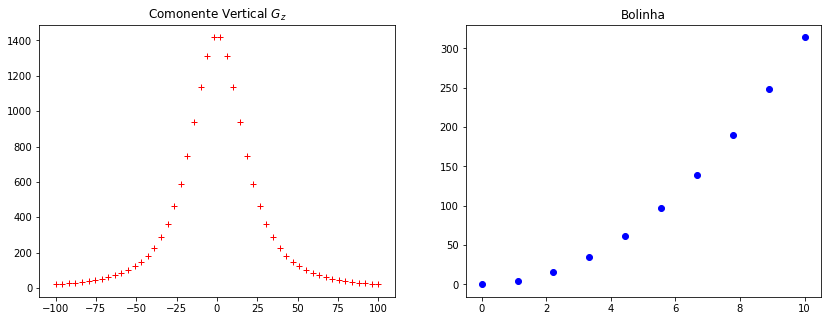

In [13]:
# plotando o resultado:
pyplot.figure(figsize=(14,5))
pyplot.subplot(1,2,1)
pyplot.plot(x,gz,'r+')
pyplot.title('Comonente Vertical $G_z$')
pyplot.subplot(1,2,2)
pyplot.plot(r,y,'bo')
pyplot.title('Bolinha')
pyplot.savefig('Figura_1.jpeg')
pyplot.show()

## TODO:
##  1) Subplot com a bolinha, colocando o tamanho da bolinha em funcao do raio
##  2) Salvar a figura e o arquivo com os dados